In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv = pd.read_csv('sales.csv')
df = pd.DataFrame(csv)

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<h2>Early Exploratory Data to Find Focus</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [4]:
df.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


[(0.0, 5000.0)]

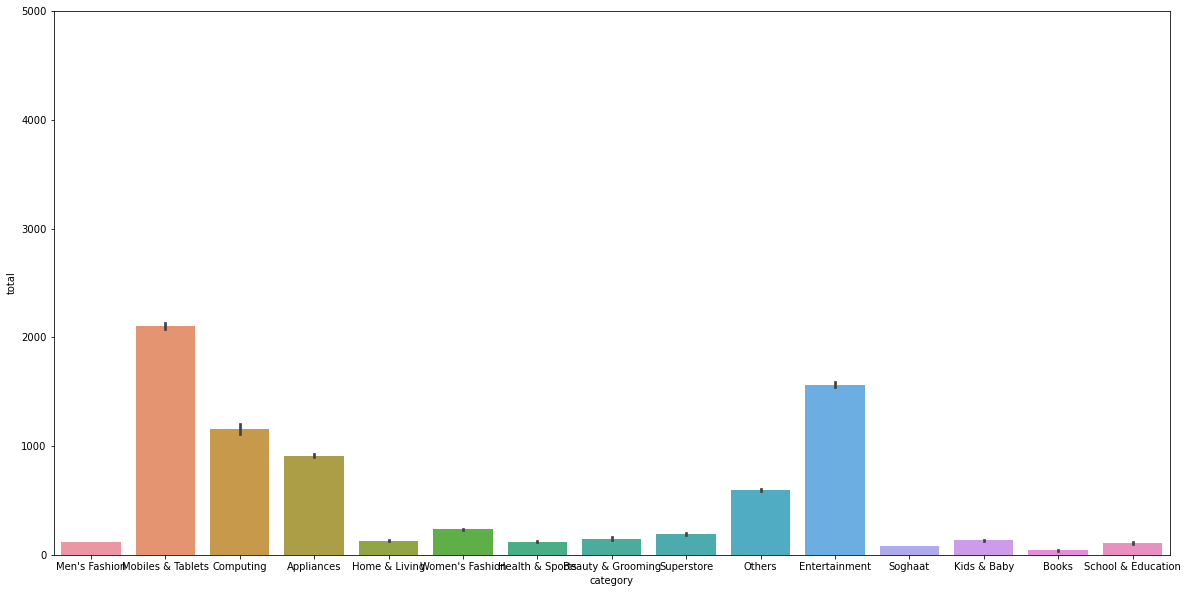

In [5]:
plt.figure(figsize = (20,10))
bp = sns.barplot(x="category",y="total", data=df)
bp.set(ylim=(0,5000))

In [6]:
sp = df.pivot_table(index="month",columns="category",values="price")

<AxesSubplot:xlabel='category', ylabel='month'>

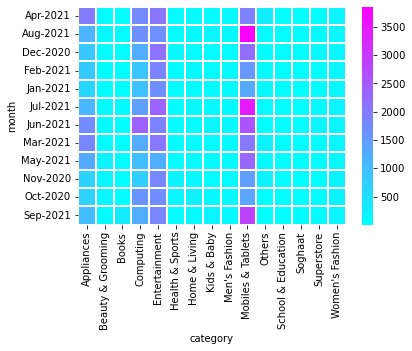

In [7]:
sns.heatmap(sp,cmap='cool',linecolor='white',linewidth=2)

<AxesSubplot:xlabel='status', ylabel='total'>

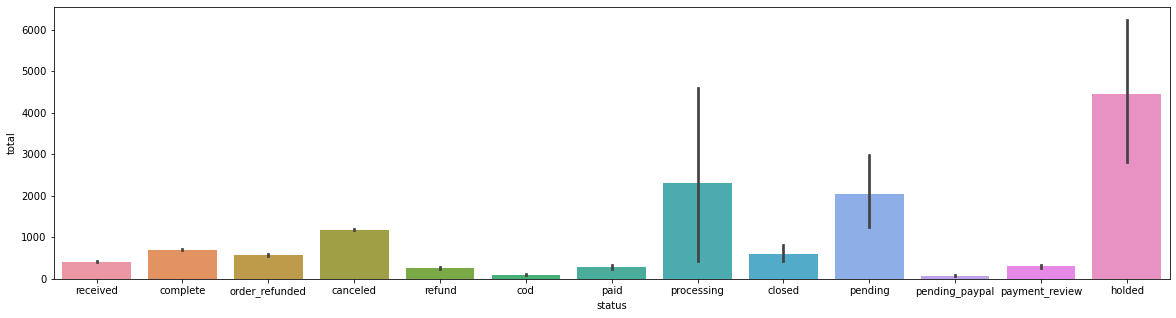

In [8]:
plt.figure(figsize=(20,5))
sns.barplot(x='status',y='total',data=df)

<h3>Realize Focus Should Be on Finding the Differences Between Completed Orders and Canceled Orders</h3>

In [9]:
completed_order = df[df['status']=='complete']
refunded_order = df[df['status']=='order_refunded']
canceled_order = df[df['status']=='canceled']

compare_df = pd.concat([completed_order,refunded_order,canceled_order],axis=0)

In [10]:
print('The average price of completed orders is: $' + str(int(completed_order['total'].mean())))
print('The average price of refunded orders is: $' + str(int(refunded_order['total'].mean())))
print('The average price of canceled orders is: $' + str(int(canceled_order['total'].mean())))

The average price of completed orders is: $703
The average price of refunded orders is: $577
The average price of canceled orders is: $1182


In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
x = (canceled_order['total'][canceled_order['total']>10000].count())
y = (df['total'][df['total']>10000].count())
z = (refunded_order['total'][refunded_order['total']>10000].count())
chance_canceled = (x/y) * 100
chance_canceled = format(chance_canceled, '.2f') 
chance_can_ref = ((x+z)/y) * 100
chance_can_ref = format(chance_can_ref, '.2f')


In [13]:
print("Currently if an order is over $10,000 there is a " + str(chance_canceled) + "% chance that the order will be canceled!")
print("Currently if an order is over $10,000 there is a " + str(chance_can_ref) + "% chance that the order will be canceled or refunded!")

Currently if an order is over $10,000 there is a 84.33% chance that the order will be canceled!
Currently if an order is over $10,000 there is a 89.07% chance that the order will be canceled or refunded!


<h3>Which Customers Cancel The Most?</h3>

In [14]:
canceled_order['User Name'].value_counts().head(5)

exbailes    685
lumelo      590
pnbraddy    421
hmbeebe     387
gebhatt     222
Name: User Name, dtype: int64

<h3>Which Customers Complete Their Orders The Most?</h3>

In [15]:
completed_order['User Name'].value_counts().head(5)

jugonzalez     863
swdivito       140
jbsummerlin    139
tnslattery     134
jqcarraway     134
Name: User Name, dtype: int64

In [16]:
orders_per_state = df['State'].value_counts().head(5)

In [17]:
print("State with Most Completed Orders: "+ 
"\n"+
str(completed_order['State'].value_counts().head(5))+ 
"\n"+
"State with Most Canceled Orders: "+
"\n"+
str(canceled_order['State'].value_counts().head(5)))

State with Most Completed Orders: 
CA    5836
TX    5494
NY    4556
PA    4517
IL    3937
Name: State, dtype: int64
State with Most Canceled Orders: 
TX    7014
CA    6378
NY    5896
PA    5784
IL    4357
Name: State, dtype: int64


In [18]:
completions_per_state=completed_order['State'].value_counts()
orders_per_state=df['State'].value_counts()
cancels_per_state=canceled_order['State'].value_counts()

In [19]:
state_stats = pd.DataFrame()

In [20]:
percent_complete = (completions_per_state/orders_per_state)*100 
percent_cancels = (cancels_per_state/orders_per_state)*100
state_stats['percentage of orders completed'] = percent_complete
state_stats['percentage of orders canceled'] = percent_cancels

In [21]:
print("State with Highest Percentage of Completed Orders vs Total Orders: "+
"\n"+
(str(state_stats['percentage of orders completed'].sort_values(ascending=False).head()))+
"\n"+
"State with Highest Percentage of Canceled Orders vs Total Orders: "+
"\n"+
str(state_stats['percentage of orders canceled'].sort_values(ascending=False).head()))

State with Highest Percentage of Completed Orders vs Total Orders: 
DE   40.420
RI   38.821
NH   35.339
MA   34.313
CA   34.069
Name: percentage of orders completed, dtype: float64
State with Highest Percentage of Canceled Orders vs Total Orders: 
VT   45.527
CO   45.016
WY   44.181
OK   43.537
ME   43.367
Name: percentage of orders canceled, dtype: float64


In [22]:
state_stats['totalsales'] = completed_order['total'].groupby(completed_order['State']).sum()
state_stats

,percentage of orders completed,percentage of orders canceled,totalsales
AK,28.019,42.447,537054.544
AL,32.426,35.206,1134351.499
AR,31.168,39.453,1033689.304
AZ,33.459,36.315,870212.283
CA,34.069,37.233,4542157.948
CO,27.760,45.016,911013.382
CT,31.610,37.043,681759.629
DC,29.276,37.265,368370.516
DE,40.420,34.965,239467.573
FL,30.936,40.605,2549132.887


In [23]:
plt.figure(figsize = (20,10))
sns.barplot(x='state',y='totalsales',data=state_stats)

ValueError: Could not interpret input 'state'

<Figure size 1440x720 with 0 Axes>

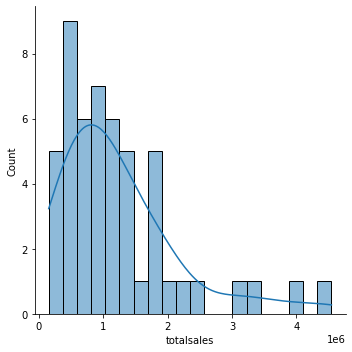

In [ ]:
sns.displot(state_stats,x='totalsales',bins=20,kde=True,)

1) Order Date whats being ordered at specific dates
2) Order id if specific customers return or accepted or refunds
3) Where most of the money comes from?
4) What state online orders the most?

In [ ]:
print("December-2021 is the most successful month with " + str(completed_order['month'].value_counts()[0])+ " sales!"+
"\n"+
"Next up is April-2021 with " + str(completed_order['month'].value_counts()[1]) +
" sales!"+ "\n" +
"Then March-2021 with " + str(completed_order['month'].value_counts()[2]) + " sales!"+
"\n" + "The rest of the sales per month go as follows:" + "\n" +
str(completed_order['month'].value_counts()[3:]))

December-2021 is the most successful month with 38183 sales!
Next up is April-2021 with 12440 sales!
Then March-2021 with 11660 sales!
The rest of the sales per month go as follows:
Jan-2021    7564
May-2021    5413
Nov-2020    4772
Feb-2021    4510
Oct-2020    2657
Jun-2021    1637
Aug-2021      82
Jul-2021      29
Sep-2021      21
Name: month, dtype: int64


In [ ]:
month_data = pd.DataFrame()
month_data['sales'] = completed_order['month'].value_counts()
month_data.reset_index(inplace=True)
month_data.rename(columns={'index':'months'},inplace=True)
month_data

,months,sales
0,Dec-2020,38183
1,Apr-2021,12440
2,Mar-2021,11660
3,Jan-2021,7564
4,May-2021,5413
5,Nov-2020,4772
6,Feb-2021,4510
7,Oct-2020,2657
8,Jun-2021,1637
9,Aug-2021,82


<AxesSubplot:xlabel='months', ylabel='sales'>

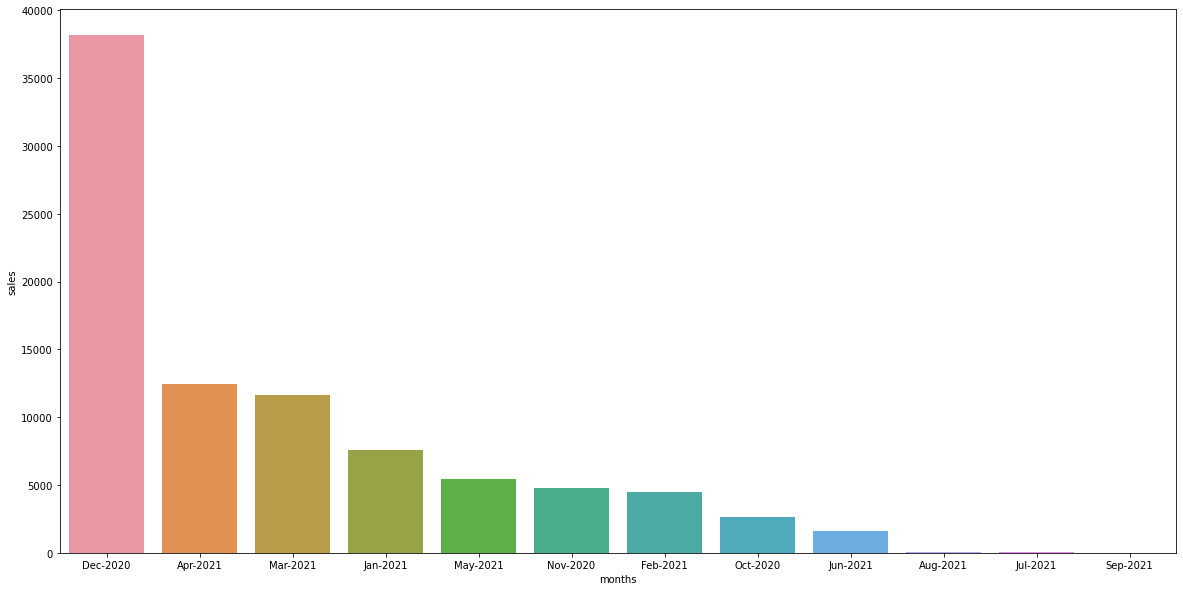

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='months',y='sales', data=month_data)

In [ ]:
categories  = completed_order['category'].value_counts()
keylist = (list(categories.index))
valuelist = categories.values
categorydf = pd.DataFrame(list(zip(keylist,valuelist)),columns=['categories','sales'])
categorydf

,categories,sales
0,Mobiles & Tablets,20295
1,Men's Fashion,14697
2,Appliances,12648
3,Women's Fashion,8668
4,Entertainment,6535
5,Beauty & Grooming,5983
6,Home & Living,4434
7,Superstore,4170
8,Health & Sports,2809
9,Computing,2536


<AxesSubplot:xlabel='categories', ylabel='sales'>

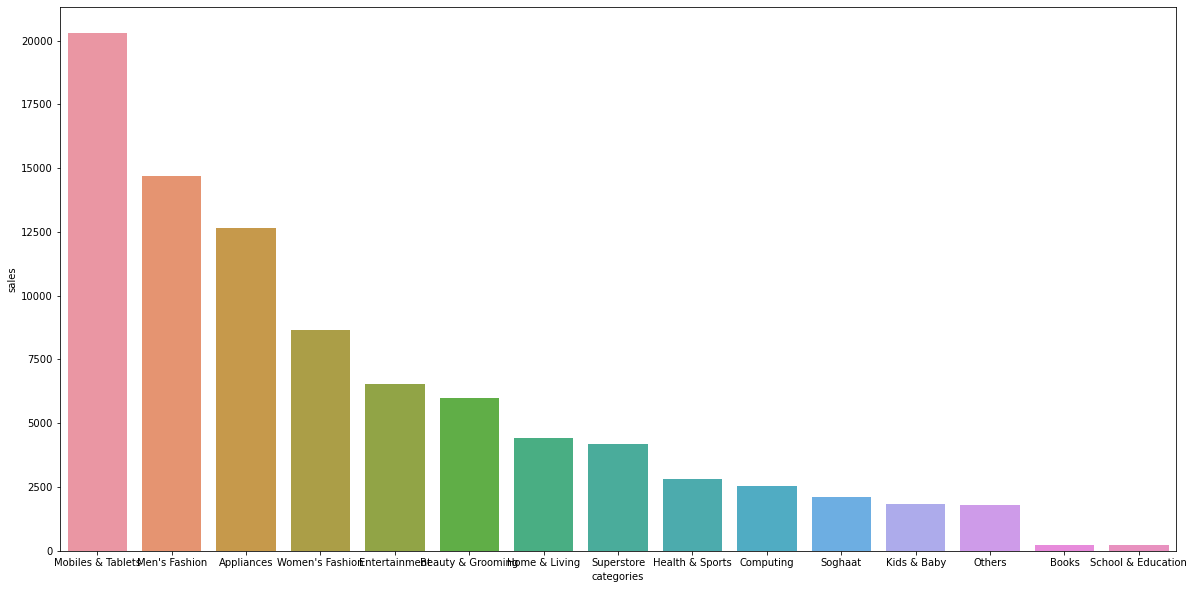

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='categories',y='sales',data=categorydf)

<h3>Model Building</h3>

In [ ]:
sales_data = pd.DataFrame()
mens_fashion = df[df['category'] == "Men's Fashion"].sort_values('month')
sales_data['mf_monthly'] = mens_fashion['month'].value_counts()
mobiles = df[df['category'] == "Mobiles & Tablets"].sort_values('month')
sales_data['mobiles_monthly'] = mobiles['month'].value_counts()
appliances = df[df['category'] == "Appliances"].sort_values('month')
sales_data['appliances_monthly'] = appliances['month'].value_counts()

In [ ]:
sales_data.reset_index(inplace=True)
sales_data.rename(columns={'index':'months'},inplace=True)
sales_data

,months,mf_monthly,mobiles_monthly,wf_monthly
0,Dec-2020,16026,19084,14306
1,Apr-2021,3658,6824,3237
2,Mar-2021,3584,5568,2759
3,Jan-2021,3251,2811,1920
4,Nov-2020,2273,3981,672
5,Jun-2021,2050,7161,4213
6,May-2021,1984,2345,1016
7,Jul-2021,1870,3771,1345
8,Oct-2020,1768,2101,512
9,Sep-2021,1577,2657,1141


In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
month_order = CategoricalDtype(
    ['Oct-2020', 'Nov-2020', 'Dec-2020', 'Jan-2021', 'Feb-2021','Mar-2021','Apr-2021','May-2021','Jun-2021','Jul-2021','Aug-2021','Sep-2021'], 
    ordered=True
)

In [ ]:
sales_data['months'] = sales_data['months'].astype(month_order)
sales_data['months']
sales_data = sales_data.sort_values('months')

In [ ]:
sales_data

,months,mf_monthly,mobiles_monthly,wf_monthly
8,Oct-2020,1768,2101,512
4,Nov-2020,2273,3981,672
0,Dec-2020,16026,19084,14306
3,Jan-2021,3251,2811,1920
10,Feb-2021,1383,1879,1035
2,Mar-2021,3584,5568,2759
1,Apr-2021,3658,6824,3237
6,May-2021,1984,2345,1016
5,Jun-2021,2050,7161,4213
7,Jul-2021,1870,3771,1345


<AxesSubplot:>

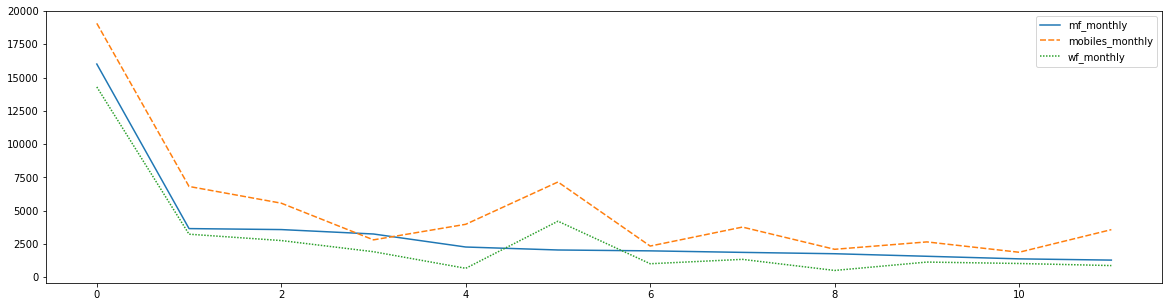

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.lineplot(data=sales_data)